In [1]:
import pandas as pd
import matplotlib as plt
import re

associativity = [1, 2, 4, 8]

%matplotlib inline

In [2]:
def read_stats(stat):
    values = []
    
    for size in associativity:
        with open(f"/home/nivetha/5SIA0-ECA-Assignments/eeg/1.2/{size}/stats.txt") as f:
            line = f.readline()
            while line:
                line = re.sub(r"\s+#.*$", "", line)
                if re.match(stat, line):
                    value = float(re.split(r"\s+", line)[1])
                    values.append(value)
                line = f.readline()
                
    return pd.Series(list(values), name=stat)

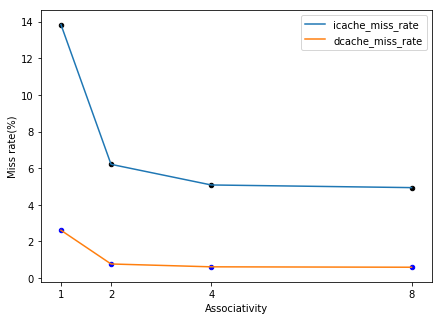

In [3]:
# associativity level vs miss rate
associativity_level = pd.Series(associativity, name='associativity')
icache_overall_miss_rates = read_stats("system.cpu.icache.overall_miss_rate::total").rename("icache_miss_rate")
dcache_overall_miss_rates = read_stats("system.cpu.dcache.overall_miss_rate::total").rename("dcache_miss_rate")

df = pd.concat([associativity_level, icache_overall_miss_rates, dcache_overall_miss_rates], axis=1)
df.dcache_miss_rate = df.dcache_miss_rate.apply(lambda x: x * 100)
df.icache_miss_rate = df.icache_miss_rate.apply(lambda x: x * 100)

ax = df.plot(kind='line', x='associativity', figsize=(7, 5))
df.plot(kind='scatter', x='associativity', y='icache_miss_rate', c='black', ax=ax)
df.plot(kind='scatter', x='associativity', y='dcache_miss_rate', c='blue', ax=ax)

ax.set_xlabel('Associativity')
ax.set_ylabel('Miss rate(%)')
ax.set_xticks(df.associativity)

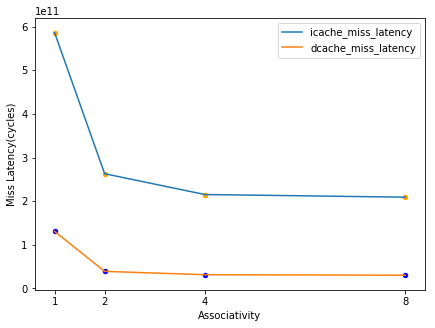

In [4]:
# associativity vs cache miss latency
associativity_level = pd.Series(associativity, name='associativity')
icache_overall_miss_rates = read_stats("system.cpu.icache.overall_miss_latency::total").rename("icache_miss_latency")
dcache_overall_miss_rates = read_stats("system.cpu.dcache.overall_miss_latency::total").rename("dcache_miss_latency")

df = pd.concat([associativity_level, icache_overall_miss_rates, dcache_overall_miss_rates], axis=1)


ax = df.plot(kind='line', x='associativity', figsize=(7, 5))
df.plot(kind='scatter', x='associativity', y='icache_miss_latency', c='orange', ax=ax)
df.plot(kind='scatter', x='associativity', y='dcache_miss_latency', c='blue', ax=ax)

ax.set_xlabel('Associativity')
ax.set_ylabel('Miss Latency(cycles)')
ax.set_xticks(df.associativity)

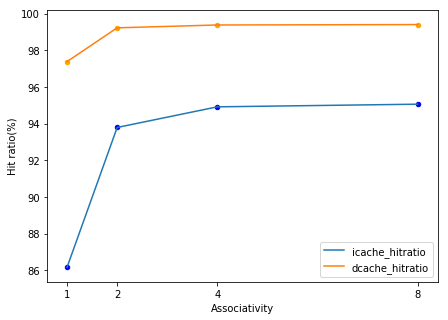

In [5]:
# associativity vs hit ratio
associativity_level = pd.Series(associativity, name='associativity')
icache_overall_hits = read_stats("system.cpu.icache.overall_hits::total").rename("icache_hits")
icache_overall_misses = read_stats("system.cpu.icache.overall_misses::total").rename("icache_misses")
dcache_overall_hits = read_stats("system.cpu.dcache.overall_hits::total").rename("dcache_hits")
dcache_overall_misses = read_stats("system.cpu.dcache.overall_misses::total").rename("dcache_misses")

df = pd.concat([associativity_level, icache_overall_hits,icache_overall_misses, dcache_overall_hits, dcache_overall_misses], axis=1)
df['icache_hitratio'] = (df['icache_hits']/(df['icache_hits'] + df['icache_misses']))*100
df['dcache_hitratio'] = (df['dcache_hits']/(df['dcache_hits'] + df['dcache_misses']))*100

df = df[['associativity', 'icache_hitratio', 'dcache_hitratio']]
ax = df.plot(kind='line', x='associativity', figsize=(7, 5))
df.plot(kind='scatter', x='associativity', y='icache_hitratio', c='blue', ax=ax)
df.plot(kind='scatter', x='associativity', y='dcache_hitratio', c='orange', ax=ax)

ax.set_xlabel('Associativity')
ax.set_ylabel('Hit ratio(%)')
ax.set_xticks(df.associativity)

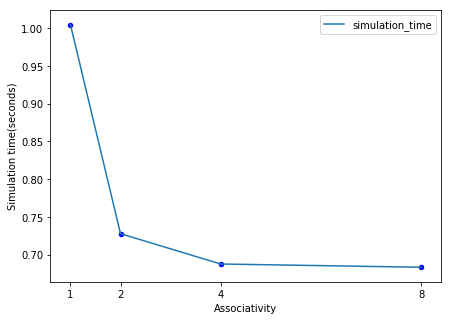

In [6]:
# associativity level vs simulation seconds
associativity_level = pd.Series(associativity, name='associativity')
simulation_time = read_stats("sim_seconds").rename("simulation_time")
# dcache_overall_hits = read_stats("system.cpu.dcache.overall_hits::total").rename("dcache_hits")

df = pd.concat([associativity_level, simulation_time], axis=1)

ax = df.plot(kind='line', x='associativity', figsize=(7, 5))
df.plot(kind='scatter', x='associativity', y='simulation_time', c='blue', ax=ax)


ax.set_xlabel('Associativity')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.associativity)